# PHAS0030 Assignment Week 6 - Light in a variable refractive index

The equation for a wave in a medium is given by:

$$ \frac{\partial^2 \theta}{\partial t^2} = c(x)^2\frac{\partial^2 \theta}{\partial x^2} $$

where $c(x)$ = c / n(x) and n(x) is the refractive index that varies with position. In this notebook, we will be exploring how a wave behaves with a variable refractive index depending on position. This is analogous to an electromagnetic wave, such as light, hitting a boundary with a different refractive index to the one it was originally in.    

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Set up the wave equation update



In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """
    Inputs: 
    theta_n   Wave at time t_n     = n*dt
    theta_nm1 Wave at time t_{n-1} = (n-1)*dt
    r         Array of constants relating to refractive index at each point (c dt/dx)
    Output:
    theta at time t_{n+1} """
    theta_np1 = 2 * (1-r ** 2) * theta_n - theta_nm1 + r** 2 * (np.roll(theta_n,-1) + np.roll(theta_n,1))
    return theta_np1 

I chose r to be an array as its value will not be the same for each point along the domain. In the array, I can set what values it will take for each point along the domain. 

### 2. Set up the wave, arrays and initial conditions

In [32]:
wavelength, frequency = 1, 1
wavevector = 2*np.pi/wavelength
w = 2 * np.pi * frequency

# Define number of points and factor r
N = 100 # chose this as graph would look best when iters / N = 10 (we define iters as 1000)
mult = 5 # Number of wavelengths
r0, r1 = 0.3, 0.15
r = r0*np.ones(mult*N)
# Start and end points for change of r
st = 2 * N
en = 3 * N 
r[st:en] = r1*np.ones(en-st) 
# Initialise
dx = wavelength / N # 1/100 = 0.01
dt = r0 * dx / (wavelength * frequency) # dt = r * dx / speed (0.3 * 0.01 / 1 = 0.003 s)
x = np.arange(0, mult * wavelength, dx)

### 3. Run the solver, storing the results, and plot

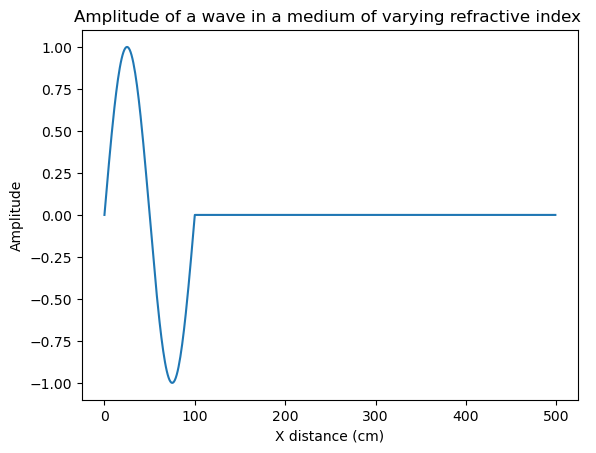

In [46]:
iters = 1000 # iters * dt = 1002 * 0.003 = 3.012 s total time for simulation 
theta = np.zeros((iters+2, mult*N)) # initialise storage array
t = 0
theta[0] = np.sin(wavevector * x - w * t) # set initial conditions 
t += dt
theta[1] = np.sin(wavevector * x - w * dt)
# Restrict initial wave to one wavelength
theta[0][N:] = np.zeros(4 * N)
theta[1][N:] = np.zeros(4 * N)

for n in range(iters): # calculate wavelength at all points
     theta[n+2] = explicit_wave_eq_update(theta[n+1], theta[n],r)
        
plt.plot(theta[0])
plt.xlabel('X distance (cm)')
plt.ylabel('Amplitude')
plt.title('Amplitude of a wave in a medium of varying refractive index ');

### 4. 3D plot

In [34]:
t = np.linspace(0, dt*(iters + 2), iters + 2) # create array for time for 3D plot
x2d, t2d = np.meshgrid(x, t) # create 2D arrays for 3d plot

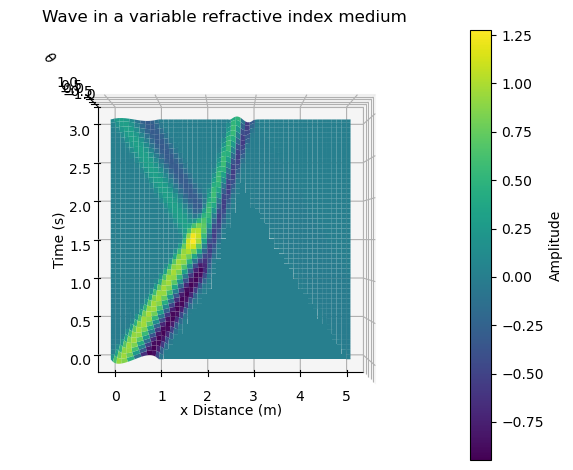

In [45]:
fig = plt.figure(tight_layout=True) # plot and label axis
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(x2d,t2d,theta,cmap='viridis') # colour surface
ax.set_xlabel('x Distance (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel(r'$\theta$')
ax.set_title('Wave in a variable refractive index medium')
fig.colorbar(surf,ax=ax, label = 'Amplitude') # set colorbar
ax.view_init(90, 270) # veiw from above

The plot above shows the incoming wave starting between 0<x<1 refracting in the medium once it hits a boundry at x = 2. The medium after the boundary has a refractive index lower than that of the medium previously, hence it refracts such that the refracted wave has an incident angle bigger than that of the incident wave on the boundary, x = 2. This makes sense and follows Snell's law:

$$ n_1 sin(\theta_1) = n_2 sin(\theta_2) $$

where $n$ is the refracive index and $\theta$ is the incident angle on the boundary. 
Part of the incoming wave also reflects from the boundary, but this wave is smaller in magnitude compared to the refracted wave.

### 6. 2D subplots

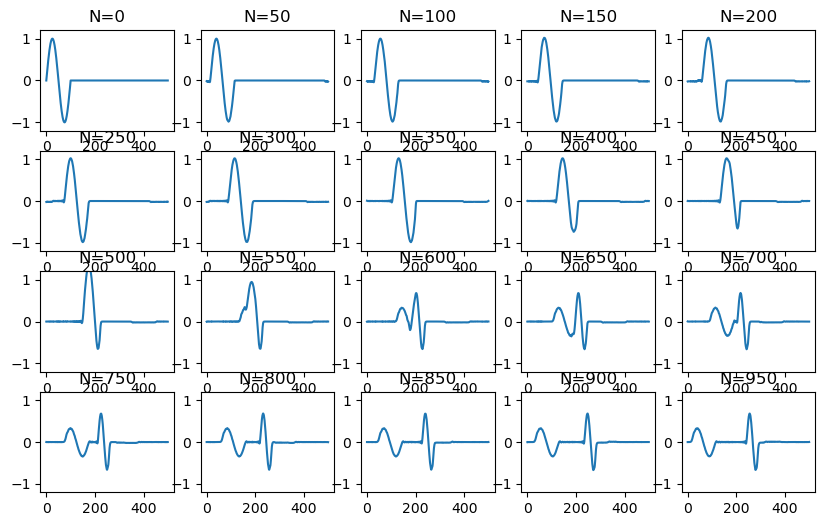

In [37]:
fig_parts = plt.figure(figsize=(10,6)) # make initial figure
rows = 5
cols = 4
num  = rows*cols
step = int(iters/num) # step size
index = 1
step_counter = 0
for i in range(num):
    ax = fig_parts.add_subplot(4,5,index) # set dimensions of subplot grid and add plots iteratively
    ax.plot(theta[step_counter]) # add plot at step
    ax.set_ylim((-1.2,1.2)) 
    ax.set_title(f'N={step_counter}')
    index += 1 # increase index and step count
    step_counter += step

The plots show above how the wave looks like as time passes, you can also see at N=550 the wave fracting when entering the medium with a lower refractive index. This form of plotting however isn't as effective as plotting in 3D, where we can clearly observe the physical phenomena of refraction happen, hence plotting in 3D (or imshow) is more effective. 